In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Part 1: A Feedforward Neural Network
### Create the data set:

In [2]:
import numpy as np
import matplotlib.pyplot as plt



def equal_split(a, n):
    a = list(range(a))
    k, m = divmod(len(a), n)
    return (len(a[i * k + min(i, m):(i + 1) * k + min(i + 1, m)]) for i in range(n))

def split_radius(r, numClass):
    return [(i*r+i, (i+1)*r+i) for i in range(numClass)]

def create_points(numClasses):
    signs = [(-1,-1), (+1,+1), (-1,+1), (+1,-1)]
    points = (i for i in range(2,300,2))
    p=[]
    i=numClasses
    j=0
    point = next(points)
    while i>0:
        s= signs[j]
        p.append((s[0]*point, s[1]*point))
        j+=1
        if j==4:
            j=0
            point = next(points)
        i-=1
    return p

def santize(distributionShape, numClasses, numOutputs ):
    try:
        assert distributionShape == 'g' or distributionShape =='c'
    except :
        raise ValueError("Please use 'g' or 'c' as distributionShape")
    if numClasses > 2:
        assert numClasses == numOutputs
    if numOutputs > numClasses:
        raise ValueError("NumClasses must be greater then numOutputs")
    if numClasses < 2 or numOutputs < 1:
        raise ValueError("NumClasses or NumOutputs should not be zero")


def generateData(numExamples, distributionShape, numClasses = 2, numOutputs=1, noise=0 ):
    """
    Generates a Dataset from a Guassian Distrubution
    numExamples: datatset size
    distributionShape: The orientation of the dataset
    
                        g' or 'c
    returns tupes of the points generates
    """
    #  Sanitation Tests  
    santize(distributionShape, numClasses, numOutputs )
    
    if numOutputs == 1:
        labels = [0,1]
    else:
        labels = list(range(numOutputs))
        
    samples_counts = equal_split(numExamples, numClasses)  
    
    possibleClassMeans = create_points(numClasses)  #  possible quadrants
  
    mean_cov = []
    guassians = []
    
    if distributionShape == 'g':     
        for numClass in range(numClasses):   
            #initialize mean
            class_mean = possibleClassMeans.pop(0)    
            #initialize Covariance Matrix
            class_cov = [[1+noise*50, 0], [0, 1+noise*50]]
            #append
            mean_cov.append((class_mean, class_cov))  
            
        for guass in mean_cov:
            # generate guassian dist. per class
            sample = next(samples_counts)
            class_x = np.random.multivariate_normal(*guass, sample) 
            class_y = np.ones((sample, 1), dtype=np.int) * labels.pop(0)
            class_xy = np.column_stack((class_x, class_y))   
            guassians.append(class_xy)
        
        all_classes =  np.row_stack(guassians)
        
        t = all_classes[:,-1]
        t = t.reshape((numExamples, -1)).astype(int)
        
        if numOutputs > 1:
            T = np.zeros((numExamples, numOutputs))
            for i in range(numExamples):
                T[i, int(t[i])] = 1
        else:
            T = t
            
        X =  np.column_stack((all_classes[:,0:-1], T))
        print(X.shape)
        return X
        
    else:
        radius = 3
        points = split_radius(radius, numClasses)
        guassians = []
        
        for point in points:
            sample = next(samples_counts)
            r = np.random.uniform(point[0], point[1], sample)
            angle = np.random.uniform(0, 2*np.pi, sample )
            x1 = r * np.cos(angle)
            x2 = r * np.sin(angle)

            noise_x1 = np.random.uniform(-points[0][0], points[-1][1], sample) * min(noise,1)
            noise_x2 = np.random.uniform(-points[0][0], points[-1][1], sample) * min(noise,1)

            noise_pos = np.column_stack((x1+noise_x1, x2+noise_x2))
            noise_dist = np.linalg.norm(noise_pos-[0,0] , axis=1)
            
            for index, pts in enumerate(points): 
                noise_dist[(noise_dist>=pts[0]) & (noise_dist<=pts[1])] = index
                noise_dist[(noise_dist>pts[1]) &  (noise_dist<pts[1]+1)] = index 
            noise_dist[(noise_dist>=points[-1][1])] = len(points)-1
            
            guass = np.row_stack((x1, x2, noise_dist))
            guass = guass.T
            guassians.append(np.array(guass))
        
        all_classes = np.row_stack(guassians)                
        t = all_classes[:,-1]
        t = t.reshape((numExamples, -1)).astype(int)
        
        if numOutputs > 1:
            T = np.zeros((numExamples, numOutputs))
            for i in range(numExamples):
                T[i, int(t[i])] = 1
        else: 
            T = t
        X = np.column_stack((all_classes[:,0:-1], T))
        print(X.shape)
        return X
    

def visualizeData(data, title):
    """
    Plots the dataset on a 2D graph
    """
    
    #collect all inputs
    if data.shape[1]==3:
        y = data[:,-1]
    else:
        y = np.argmax(data[:, 2:], axis=1)    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([1,1,1,1])
    
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0)) 
    
    ax.set_title(title)
    ax.scatter(data[:,0],data[:,1], c=y, alpha=1 )
    

def visualizeSubplot(data, title):
    if data.shape[1]==3:
            y = data[:,-1]
    else:
        y = np.argmax(data[:, 2:], axis=1)    

    ax.set_title(title)

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0)) 
    ax.scatter(X[:,0],X[:,1], c=y, alpha=0.3 )

    

In [91]:
def derivative_w2(H, T, Y):
    """
    derivative of the loss wrt w2 (dL/dW1)
    assuming cross-entropy loss (-TlogY)
    """
    dZ = T-Y 
    res =  H.T.dot(dZ)
#     print("D_W2", res.shape)
    return res

def dW2(H, T, Y):
    # a * dZ
    # dz = (T-Y)*Y(1-Y)
    dZ = (T-Y)* Y*(1-Y)
    return H.T.dot(dZ)

def dW1(X, H, T, Y, W2, dsigma):
    #[dZ*W2] * dsigma[H]
    dZ1 = (T-Y)* Y*(1-Y)
    dZ2 = np.dot(dZ1, W2.T) * dsigma(H)
    return np.dot(X.T, dZ2)
    

def derivative_w1(X, Z, T, Y, W2, dsigma):
    """
    derivative of the loss wrt w1 (dL/dW2)
    with given derivative of activation function (dsigma)
    """   
    
    dZ = (T - Y).dot(W2.T) * dsigma(Z)
    res = X.T.dot(dZ)
#     print("D_W1", res.shape)
    return res

def get_activation(activationType):
    """
    Returns the activation formula depending
    on the type
    """
    if activationType == 'linear':
        return lambda z: z
    elif activationType == 'sigmoid':
        return lambda z: 1/(1 + np.exp(-(z)))
    elif activationType == 'reLu':
        return lambda z: np.maximum(0, z)
    else:
        raise ValueError("Please enter a valid Activation type!")

def activation_deriv(activationType):
    """
    Returns the derivation of the activation
    function depending on the type
    """
    if activationType == 'sigmoid':
        return lambda z: z*(1-z)
    elif activationType == 'reLu':
        return lambda z: (z > 0).astype(int)
    elif activationType == 'linear':
        def linear(z):
            z[:]=1
            return z
        return linear  ##### check!!!!!!!!!!!!!!!
    else:
        raise ValueError("Please enter a valid Activation type!")

def classification_rate(target, prediction):
    """
    outputs the accuracy rate 
    """
    assert target.shape == prediction.shape
    total = target.shape[0]
    eq = np.equal(target, prediction)
    correct = np.all(eq, axis=1).sum()
    
    return round(correct/total, 4) * 100


def cost_l2(y, t):
    """
    The L2 loss function
    """
    total =  0.5 * ((y-t)**2)
    return total.sum()


def cost_entropy(y, t):
    """
    The Cross-entropy loss function
    """
    total =  -(t * np.log(y))
    return total.sum()


def train(X, numInput, numHiddenUnits, numOutput, activationType, numIter):
    """
    To Train A training set based on the arugments 
    """
    
    samples = X.shape[0]
    
    x = X[:, 0:numInput]
    t = X[:, numInput:]
    t = t.reshape((samples, -1)).astype(int)
    T = t
    assert x.shape[1] + T.shape[1] == numInput + numOutput
    
    #  Add bias to input layer
    b1 = np.ones((samples, 1))
    x = np.column_stack((x,b1))
    
    # Randomize weights
    W1 = 2*np.random.random((numInput+1, numHiddenUnits)) - 1  #  (+1)==> bias accounted for
    W2 = 2*np.random.random((numHiddenUnits, numOutput)) - 1
    
    #  Create and fill indicatior matrix for outputs>1 (softmax)
#     if numOutput > 1:
#         T = np.zeros((samples, numOutput))
#         for i in range(samples):
#             T[i, t[i]] = 1
#     else:
#         T = t
    
    #  Determine activation type
    activation = get_activation(activationType)
    
    learning_rate = 1e-4
    interval_print = 10
    costs = []
    accuracy = []

    if numOutput == 1:
        #  sigmoid layer and L2 loss
        for epoch in range(numIter):
            #  Forward pass
            h = activation(x.dot(W1)) #  hidden layer
            Y = 1/(1 + np.exp(-(h.dot(W2))))

            if epoch%interval_print == 0:           
                prediction = np.rint(Y)
                c = cost_l2(Y, T)
                costs.append((c))
                accuracy.append(classification_rate(T, prediction))         
            
            W2 += learning_rate * dW2(h, T, Y)
            W1 += learning_rate * dW1(x, h, T, Y, W2, activation_deriv(activationType))

    else:
        #  softmax layer and cross-entropy loss 

        for epoch in range(numIter):
            #  Forward pass
            h = activation(x.dot(W1)) #  hidden layer   
            A = h.dot(W2)
            expA = np.exp(A)
            Y = expA / ( expA.sum(axis=1, keepdims=True) )

            if epoch%interval_print == 0:
                prediction = (Y == Y.max(axis=1)[:,None]).astype(int)
                c = cost_entropy(Y, T)
                costs.append((c))
                accuracy.append(classification_rate(T, prediction))
            
            #  Back pass    
            W2 += learning_rate * derivative_w2(h, T, Y)
            W1 += learning_rate * derivative_w1(x, h, T, Y, W2, activation_deriv(activationType))
    
    #  Plot Graphs for illustration
    print("Iterations: ", numIter)
    print("Final Training Accuracy: ", accuracy[-1])
    print("Activation Type: ", activationType)
    fig, axes = plt.subplots(1,2, figsize=(10,5) )

    ax1 = axes[0]
    ax2 = axes[1]
    
    ax1.set_title("Graph of Cost(Loss) vs Iteration")
    ax1.set_ylabel("Loss")
    ax1.set_xlabel("Iterations")
    ax1.plot(costs)
    
    ax2.set_title("Graph of Accuracy vs Iteration")
    ax2.set_ylabel("Accuracy")
    ax2.set_xlabel("Iterations")
    ax2.plot(accuracy)
    
    
    return (W1,W2)


def predict(X, W1, W2, numInput, numHiddenUnits, numOutput, activationType, verbosity):
    """
    Give the prediction of a test data set
    """
        
    samples = X.shape[0]
    
    x = X[:, 0:numInput]
    t = X[:, numInput:]
    t = t.reshape((samples, -1)).astype(int)
    T = t
    assert x.shape[1] + T.shape[1] == numInput + numOutput
    
#     x = X[:, 0:numInput]
#     t = X[:, -1]
#     t = t.reshape((samples, -1)).astype(int)
    
    assert W1.shape[1] == numHiddenUnits
    assert W1.shape[0] == x.shape[1] +1
    assert W2.shape[1] == numOutput

    
    #  Create and fill indicatior matrix
#     if numOutput > 1:
#         T = np.zeros((samples, numOutput))
#         for i in range(samples):
#             T[i, t[i]] = 1
#     else:
#         T = t
    
    #  Add bias to input layer
    b1 = np.ones((samples, 1))
    x = np.column_stack((x,b1))
    
    activation = get_activation(activationType)
    
    # make a forward pass
    h = activation(x.dot(W1)) #  hidden layer
    if numOutput==1:
        #  use Sigmoid
        Y = activation(h.dot(W2)) # output layer
        prediction = np.rint(Y)  # less than 0.5 == 0, greater 0.5 == 1
    else:
        # Use Softmax
        A = h.dot(W2)
        expA = np.exp(A)
        Y = expA / (expA.sum(axis=1, keepdims=True))  
#         prediction = np.argmax(Y, axis=1)
        prediction = (Y == Y.max(axis=1)[:,None]).astype(int)
    
    c_entrop_e = -(T * np.log(Y)).sum(axis=1, keepdims=True)
    
    res = np.column_stack((X, prediction, c_entrop_e))
    
    if verbosity == True:
        print("X Shape: ==>", X.shape)
        print("W1 Shape: ==>", W1.shape)
        print("W2 Shape: ==>", W2.shape)
        print("prediction Output Shape ==>", res.shape)
        print()
    
    print("Accuracy(%): ", classification_rate(T, prediction))
    
    return res


def split_train_test(x, train_ratio):
    """
    function split data points into a ratio 
    x: train data
    y: train labels
    train_ratio: ratio of train data between 0 and 1
    
    returns a tuple (x_train, y_train, x_test, y_test)
    """
    if not 0 < train_ratio < 1:
        raise ValueError("Train ratio must be between 0 and 1")
    
    test_ratio = 1 - train_ratio
    size = x.shape[0]
    
    # slice data in train_data and test_data 
    x_train = x[:int(train_ratio*size)]
    x_test = x[-int(test_ratio*size):]
    
    return (x_train, x_test )

## Option 3 : Create and visualize both Gaussian clusters and concentric circles


## Guasians

(1000, 3)
(1000, 5)
(1000, 7)
(1000, 10)


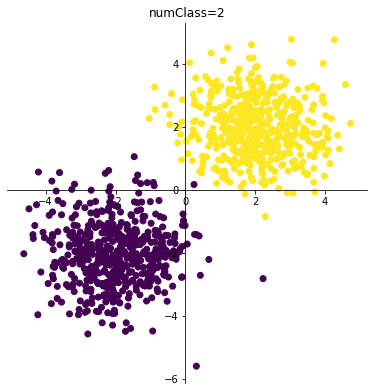

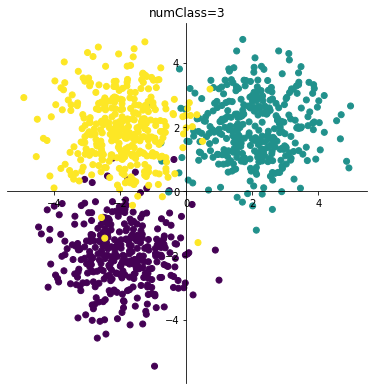

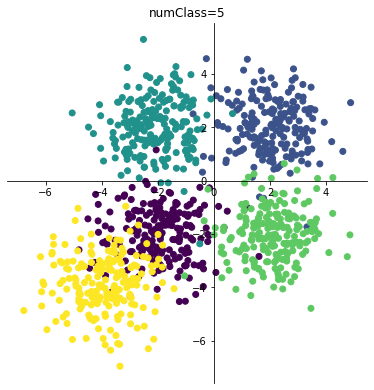

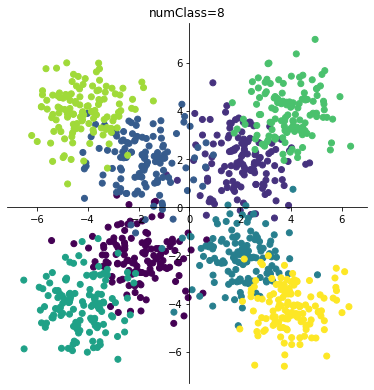

In [4]:
X1 = generateData(1000, 'g', numClasses = 2, numOutputs=1, noise=0)
X2 = generateData(1000, 'g', numClasses = 3, numOutputs=3, noise=0)
X3 = generateData(1000, 'g', numClasses = 5, numOutputs=5, noise=0)
X4 = generateData(1000, 'g', numClasses = 8, numOutputs=8, noise=0)

visualizeData(X1, "numClass=2")
visualizeData(X2, "numClass=3")
visualizeData(X3, "numClass=5")
visualizeData(X4, "numClass=8")


# Part1B: Plotting with Different Noise settings

### NumClasses = 3

(5000, 5)
(5000, 5)
(5000, 5)
(5000, 5)


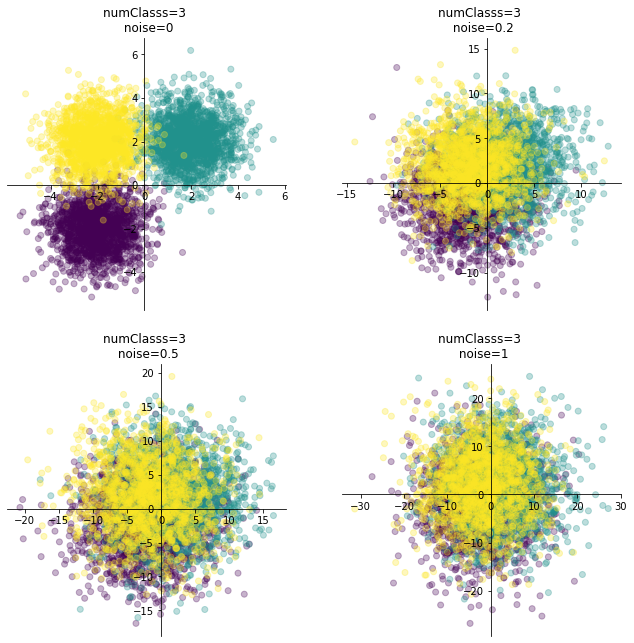

In [5]:
fig, axes = plt.subplots(2,2, figsize=(11,11))

noises = (i for i in [0, 0.2, 0.5, 1])
for row in axes:
    for ax in row:
        noise=next(noises)
        X = generateData(5000, 'g', numClasses=3, numOutputs=3, noise=noise)
        visualizeSubplot(X, f'numClasss=3 \n noise={noise}')


### NumClasses=4

(5000, 6)
(5000, 6)
(5000, 6)
(5000, 6)


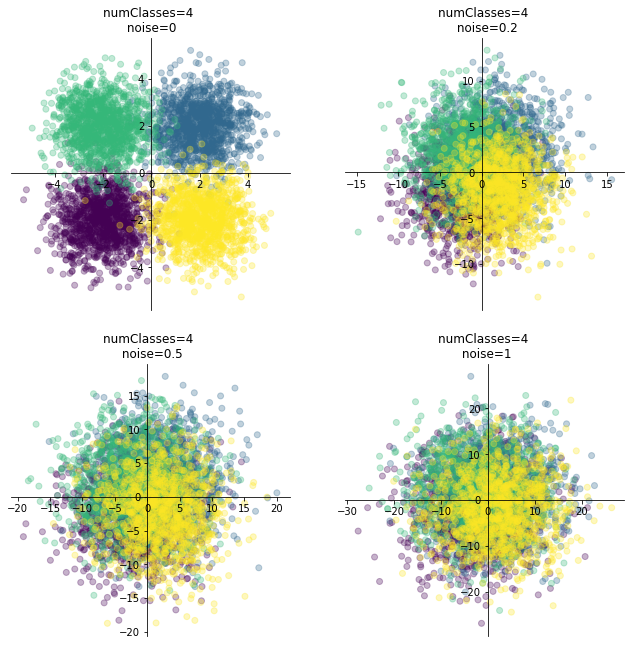

In [6]:
fig, axes = plt.subplots(2,2, figsize=(11,11))

noises = (i for i in [0, 0.2, 0.5, 1])
for row in axes:
    for ax in row:
        noise=next(noises)
        X = generateData(5000, 'g', numClasses=4, numOutputs=4, noise=noise)
        visualizeSubplot(X, f'numClasses=4 \n noise={noise}')

# Option c : Concentric Circles

(5000, 3)
(5000, 5)
(5000, 7)


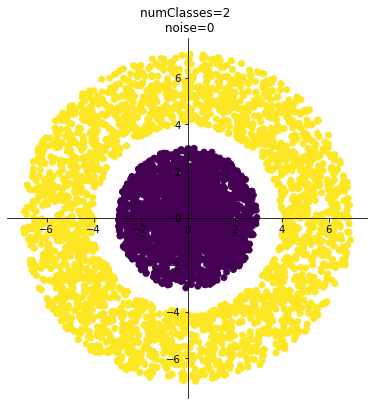

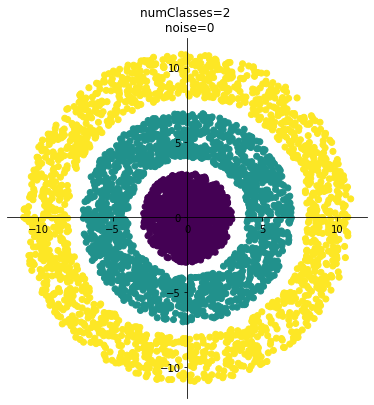

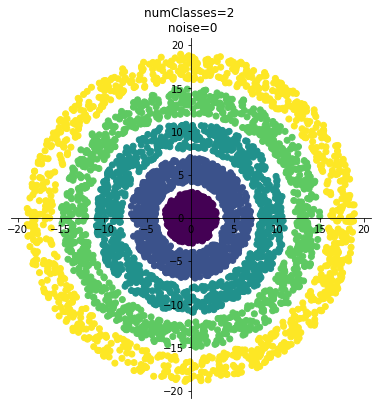

In [7]:
X1 = generateData(5000, 'c', numClasses=2, numOutputs=1, noise=0)
X2 = generateData(5000, 'c', numClasses=3, numOutputs=3, noise=0)
X3 = generateData(5000, 'c', numClasses = 5, numOutputs=5, noise=0)


visualizeData(X1, f'numClasses=2 \n noise=0')
visualizeData(X2, f'numClasses=2 \n noise=0')
visualizeData(X3, f'numClasses=2 \n noise=0')



# Part1B:  Plotting with Different Noise settings
## NumClasses = 2

(5000, 3)
(5000, 3)
(5000, 3)
(5000, 3)


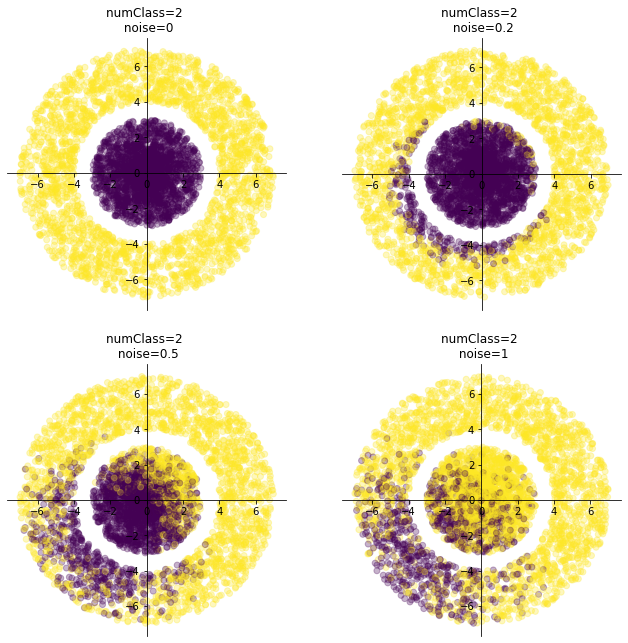

In [11]:
fig, axes = plt.subplots(2,2, figsize=(11,11))

noises = (i for i in [0, 0.2, 0.5, 1])
for row in axes:
    for ax in row:
        noise=next(noises)
        X = generateData(5000, 'c', numClasses=2, numOutputs=1, noise=noise)
        visualizeSubplot(X, f'numClass=2 \n noise={noise}')

## NumClasses = 4

(5000, 6)
(5000, 6)
(5000, 6)
(5000, 6)


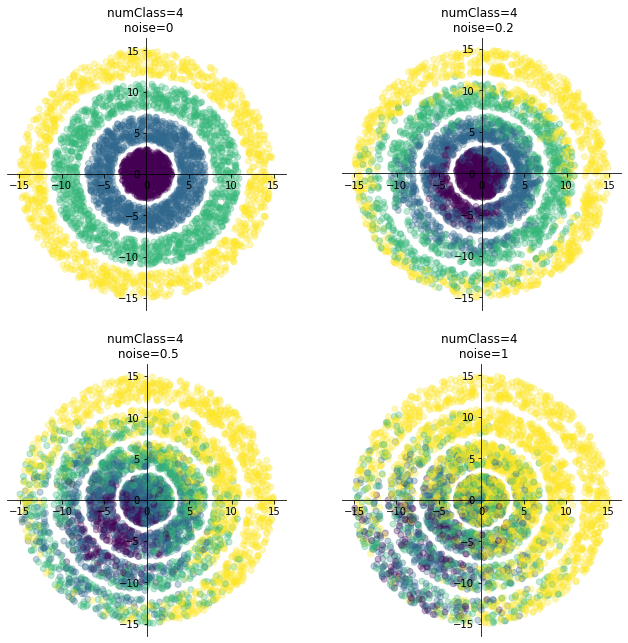

In [12]:
fig, axes = plt.subplots(2,2, figsize=(11,11))

noises = (i for i in [0, 0.2, 0.5, 1])
for row in axes:
    for ax in row:
        noise=next(noises)
        X = generateData(5000, 'c', numClasses=4, numOutputs=4, noise=noise)
        visualizeSubplot(X, f'numClass=4 \n noise={noise}')

<hr>

<hr>

# Part 1C:  Train a small feedforward neural network.

## Scenario1
##  TwoClusters(Sigmoid unit) with No Noise
## numClasses=2, numOutput=1 , Noise=0
### Prepare Data Sets


(500, 3)


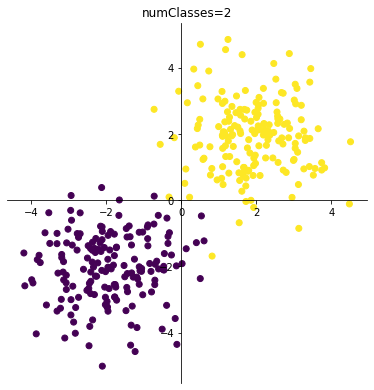

In [68]:
X_guass1 = generateData(500, 'g', numClasses=2, numOutputs=1, noise=0)
np.random.shuffle(X_guass1)
X_guass1_train, X_guass1_test = split_train_test(X_guass1, 0.7)
visualizeData(X_guass1_train, 'numClasses=2')

### Training with Sigmoid Activation function


Noise:  0
Iterations:  100
Final Training Accuracy:  99.71
Activation Type:  sigmoid


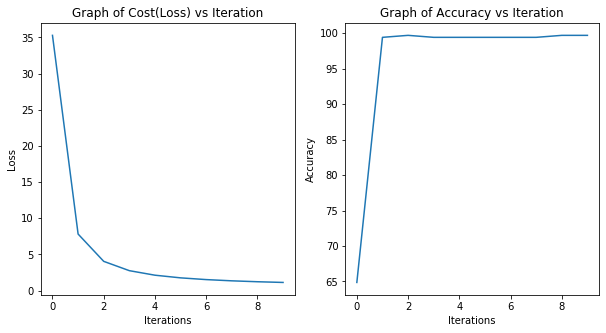

In [64]:
# train( X, numInput, numHiddenUnits, numOutput, activationType, numIter) \\
print("Noise: ", 0)
W1, W2 = train(X_guass1_train, numInput=2, numHiddenUnits=4, numOutput=1, activationType='sigmoid', numIter=100)

### Testing with Sigmoid

In [67]:
# W1, W2 = train(X, numInput=2, numHiddenUnits=4, numOutput=2, activationType='sigmoid', numIter=100000)
pred = predict(X_guass1_test, W1, W2, numInput=2, numHiddenUnits=4, numOutput=1, activationType='sigmoid', verbosity=True )
print("sample output")
print(pred[:3])


X Shape: ==> (150, 3)
W1 Shape: ==> (3, 4)
W2 Shape: ==> (4, 1)
prediction Output Shape ==> (150, 5)

Accuracy(%):  100.0
sample output
[[ 0.38714477  1.98291569  1.          1.          0.05727919]
 [-2.76759368 -0.81628371  0.          0.         -0.        ]
 [ 1.33696909  2.62103336  1.          1.          0.03392011]]


### Training with ReLu Activation function

Noise:  0
Iterations:  100
Final Training Accuracy:  99.42999999999999
Activation Type:  reLu


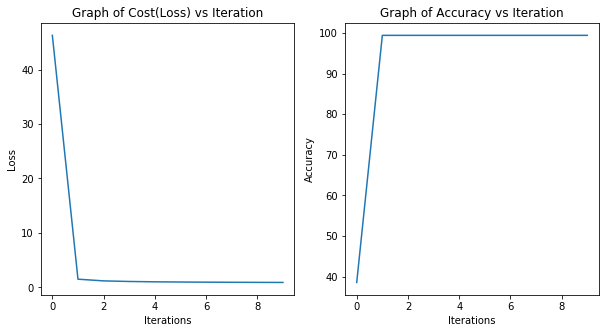

In [69]:
# train( X, numInput, numHiddenUnits, numOutput, activationType, numIter) \\
print("Noise: ", 0)
W1, W2 = train(X_guass1_train, numInput=2, numHiddenUnits=4, numOutput=1, activationType='reLu', numIter=100)

### Testing with ReLu

In [72]:
# W1, W2 = train(X, numInput=2, numHiddenUnits=4, numOutput=2, activationType='reLU', numIter=100000)

pred = predict(X_guass1_test, W1, W2, numInput=2, numHiddenUnits=4, numOutput=1, activationType='reLu', verbosity=True )
print("sample output")
print(pred[:3])

X Shape: ==> (150, 3)
W1 Shape: ==> (3, 4)
W2 Shape: ==> (4, 1)
prediction Output Shape ==> (150, 5)

Accuracy(%):  100.0
sample output
[[ 2.49257877  1.54239278  1.          1.          0.15659303]
 [ 2.04873812  2.91656655  1.          1.          0.15473783]
 [-1.68080158 -0.04505002  0.          0.         -0.        ]]


### Training with Linear Activation function

Noise:  0
Iterations:  100
Final Training Accuracy:  99.14
Activation Type:  linear


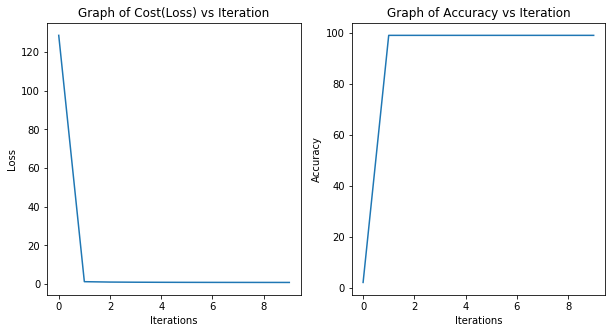

In [73]:
# train( X, numInput, numHiddenUnits, numOutput, activationType, numIter) \\
print("Noise: ", 0)
W1, W2 = train(X_guass1_train, numInput=2, numHiddenUnits=4, numOutput=1, activationType='linear', numIter=100)

### Testing with Linear

In [76]:
# W1, W2 = train(X, numInput=2, numHiddenUnits=4, numOutput=2, activationType='reLU', numIter=100000)
pred = predict(X_guass1_test, W1, W2, numInput=2, numHiddenUnits=4, numOutput=1, activationType='linear', verbosity=True )
print("sample output")
print(pred[:3])

X Shape: ==> (150, 3)
W1 Shape: ==> (3, 4)
W2 Shape: ==> (4, 1)
prediction Output Shape ==> (150, 5)

Accuracy(%):  98.0
sample output
[[ 2.49257877  1.54239278  1.          1.          0.54025914]
 [ 2.04873812  2.91656655  1.          1.          0.47404229]
 [-1.68080158 -0.04505002  0.          0.         -0.        ]]


<hr>

## Scenario2
##  TwoClusters(Softmax  Layer) with High Noise
## numClasses=2, numOutput=2 , Noise=0.8
### Prepare Data Sets


(500, 4)


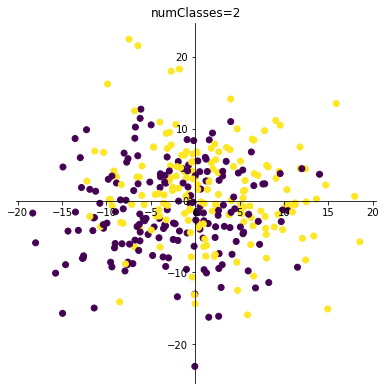

In [102]:
X_guass2 = generateData(500, 'g', numClasses=2, numOutputs=2, noise=0.8)
np.random.shuffle(X_guass2)
X_guass2_train, X_guass2_test = split_train_test(X_guass2, 0.7)
visualizeData(X_guass2_train, 'numClasses=2')

## Training with Sigmoid Activation function


Noise:  0.8
Iterations:  100
Final Training Accuracy:  67.71000000000001
Activation Type:  sigmoid


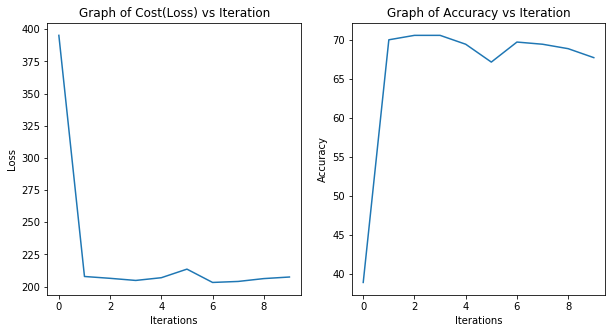

In [83]:
# train( X, numInput, numHiddenUnits, numOutput, activationType, numIter) \\
print("Noise: ", 0.8)
W1, W2 = train(X_guass2_train, numInput=2, numHiddenUnits=4, numOutput=2, activationType='sigmoid', numIter=100)

#### Testing with Sigmoid

In [84]:
# W1, W2 = train(X, numInput=2, numHiddenUnits=4, numOutput=2, activationType='sigmoid', numIter=100000)
pred = predict(X_guass2_test, W1, W2, numInput=2, numHiddenUnits=4, numOutput=2, activationType='sigmoid', verbosity=True )
print("sample output")
print(pred[:3])

X Shape: ==> (150, 4)
W1 Shape: ==> (3, 4)
W2 Shape: ==> (4, 2)
prediction Output Shape ==> (150, 7)

Accuracy(%):  67.33
sample output
[[ -6.27526392   3.44813608   1.           0.           1.
    0.           0.50235488]
 [-11.24584462  -8.96884272   1.           0.           1.
    0.           0.3033898 ]
 [ -5.2549469   -3.95930683   0.           1.           1.
    0.           1.25010614]]


## Training with ReLu Activation function

Noise:  0.8
Iterations:  100
Final Training Accuracy:  71.14
Activation Type:  reLu


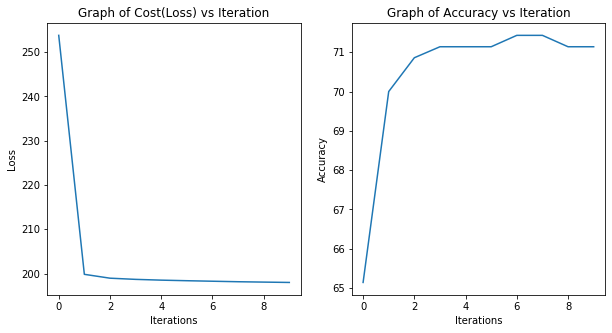

In [97]:
# train( X, numInput, numHiddenUnits, numOutput, activationType, numIter) \\
print("Noise: ", 0.8)
W1, W2 = train(X_guass2_train, numInput=2, numHiddenUnits=4, numOutput=2, activationType='reLu', numIter=100)

#### Testing with ReLu

In [98]:
# W1, W2 = train(X, numInput=2, numHiddenUnits=4, numOutput=2, activationType='reLU', numIter=100000)
pred = predict(X_guass2_test, W1, W2, numInput=2, numHiddenUnits=4, numOutput=2, activationType='reLu', verbosity=True )
print("sample output")
print(pred[:5])

X Shape: ==> (150, 4)
W1 Shape: ==> (3, 4)
W2 Shape: ==> (4, 2)
prediction Output Shape ==> (150, 7)

Accuracy(%):  66.0
sample output
[[ 1.17929065  1.64306271  1.          0.          0.          1.
   0.87056558]
 [-6.19870454 10.01799369  0.          1.          0.          1.
   0.30888577]
 [ 7.63363783 -3.62734519  0.          1.          0.          1.
   0.33093049]
 [-5.84908476 -1.61790957  1.          0.          1.          0.
   0.30931387]
 [-2.42839459  6.76781314  0.          1.          0.          1.
   0.39446814]]


## Training with Linear Activation function

Noise:  0.8
Iterations:  1000
Final Training Accuracy:  65.14
Activation Type:  linear


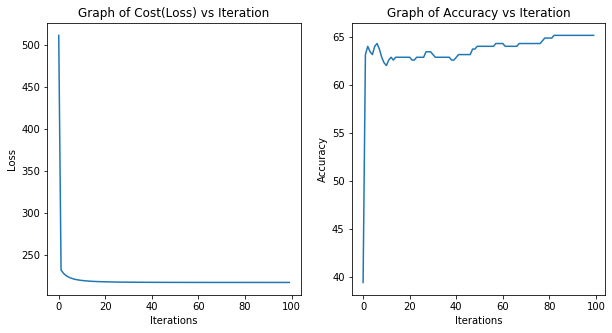

In [103]:
# train( X, numInput, numHiddenUnits, numOutput, activationType, numIter) \\
print("Noise: ", 0.8)
W1, W2 = train(X_guass2_train, numInput=2, numHiddenUnits=4, numOutput=2, activationType='linear', numIter=1000)

#### Testing with Linear

In [45]:
# W1, W2 = train(X, numInput=2, numHiddenUnits=4, numOutput=2, activationType='reLU', numIter=100000)
pred = predict(X_guass2_test, W1, W2, numInput=2, numHiddenUnits=4, numOutput=2, activationType='linear', verbosity=True )
print("sample output")
print(pred[:3])

X Shape: ==> (150, 4)
W1 Shape: ==> (3, 4)
W2 Shape: ==> (4, 2)
prediction Output Shape ==> (150, 7)

Accuracy(%):  68.67
sample output
[[-10.87686797   0.56393797   1.           0.           1.
    0.           0.35384827]
 [ -7.69946758  -1.02121277   1.           0.           1.
    0.           0.40473033]
 [  3.02130601   5.97589931   0.           1.           0.
    1.           0.35423207]]


<hr>

<hr>

<hr>

##  Circles(Sigmoid unit) with No Noise

## Scenario1
## numClasses=2, numOutput=1 , Noise=0


### Prepare Data Sets



(500, 3)


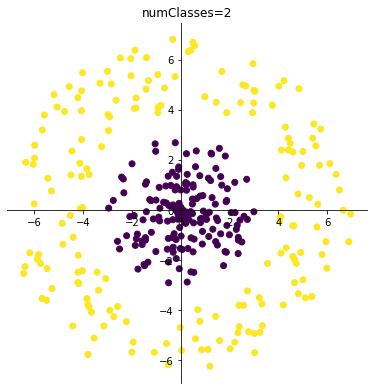

In [123]:
X_circles1 = generateData(500, 'c', numClasses=2, numOutputs=1, noise=0)
np.random.shuffle(X_circles1)
X_circles1_train, X_circles1_test = split_train_test(X_circles1, 0.7)
visualizeData(X_circles1_train, 'numClasses=2')

### Training with Sigmoid Activation function


Noise:  0
Iterations:  100000
Final Training Accuracy:  100.0
Activation Type:  sigmoid


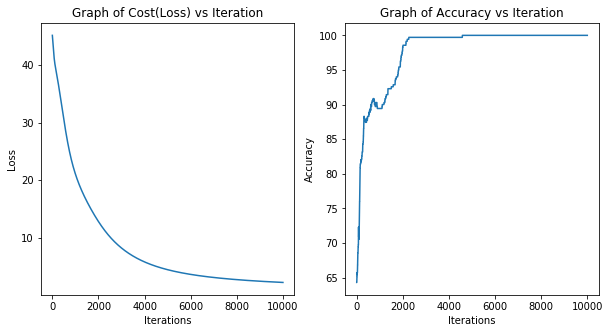

In [119]:
# train( X, numInput, numHiddenUnits, numOutput, activationType, numIter) \\
print("Noise: ", 0)
W1, W2 = train(X_circles1_train, numInput=2, numHiddenUnits=4, numOutput=1, activationType='sigmoid', numIter=100000)

### Testing with Sigmoid

In [114]:
# W1, W2 = train(X, numInput=2, numHiddenUnits=4, numOutput=2, activationType='sigmoid', numIter=100000)
pred = predict(X_circles1_test, W1, W2, numInput=2, numHiddenUnits=4, numOutput=1, activationType='sigmoid', verbosity=True )
print("sample output")
print(pred[:3])


X Shape: ==> (150, 3)
W1 Shape: ==> (3, 4)
W2 Shape: ==> (4, 1)
prediction Output Shape ==> (150, 5)

Accuracy(%):  100.0
sample output
[[-1.03666976  0.25838671  0.          0.         -0.        ]
 [ 0.01998343 -0.12520102  0.          0.         -0.        ]
 [ 1.75972387  0.62814808  0.          0.         -0.        ]]


### Training with ReLu Activation function

Noise:  0
Iterations:  100000
Final Training Accuracy:  100.0
Activation Type:  reLu


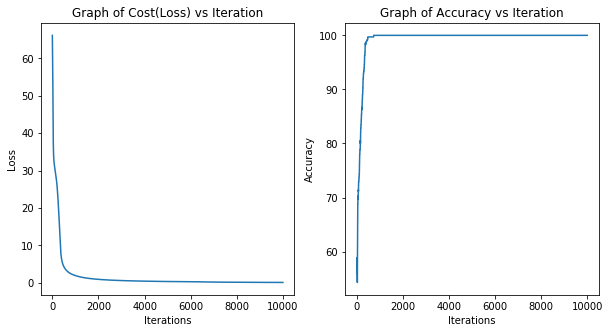

In [115]:
# train( X, numInput, numHiddenUnits, numOutput, activationType, numIter) \\
print("Noise: ", 0)
W1, W2 = train(X_circles1_train, numInput=2, numHiddenUnits=4, numOutput=1, activationType='reLu', numIter=100000)

### Testing with ReLu

In [120]:
# W1, W2 = train(X, numInput=2, numHiddenUnits=4, numOutput=2, activationType='reLU', numIter=100000)

pred = predict(X_circles1_test, W1, W2, numInput=2, numHiddenUnits=4, numOutput=1, activationType='reLu', verbosity=True )
print("sample output")
print(pred[:3])

X Shape: ==> (150, 3)
W1 Shape: ==> (3, 4)
W2 Shape: ==> (4, 1)
prediction Output Shape ==> (150, 5)

Accuracy(%):  98.67
sample output
[[-4.26757225 -1.9345542   1.          1.          0.32807683]
 [ 0.34484095  0.44502931  0.          0.         -0.        ]
 [ 3.51155954  3.31184566  1.          1.          0.06304419]]


### Training with Linear Activation function

Noise:  0
Iterations:  1000
Final Training Accuracy:  66.29
Activation Type:  linear


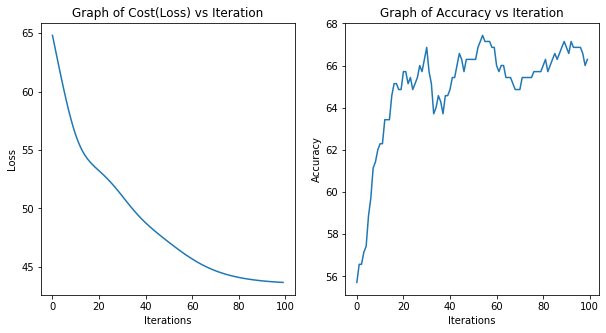

In [128]:
# train( X, numInput, numHiddenUnits, numOutput, activationType, numIter) \\
print("Noise: ", 0)
W1, W2 = train(X_circles1_train, numInput=2, numHiddenUnits=4, numOutput=1, activationType='linear', numIter=1000)

### Testing with Linear

In [130]:
# W1, W2 = train(X, numInput=2, numHiddenUnits=4, numOutput=2, activationType='reLU', numIter=100000)
pred = predict(X_circles1_test, W1, W2, numInput=2, numHiddenUnits=4, numOutput=1, activationType='linear', verbosity=True )
print("sample output")
print(pred[:3])

X Shape: ==> (150, 3)
W1 Shape: ==> (3, 4)
W2 Shape: ==> (4, 1)
prediction Output Shape ==> (150, 5)

Accuracy(%):  38.67
sample output
[[ 0.10520636 -0.02547552  0.          1.         -0.        ]
 [-2.95815681 -3.38853965  1.          1.          0.66990216]
 [ 5.38201154 -1.44317507  1.          1.          0.64943436]]


<hr>

<hr>

##  Circles(Softmax layer) with High Noise

## Scenario2
## numClasses=2, numOutput=2 , Noise=0.8


### Prepare Data Sets



(500, 4)


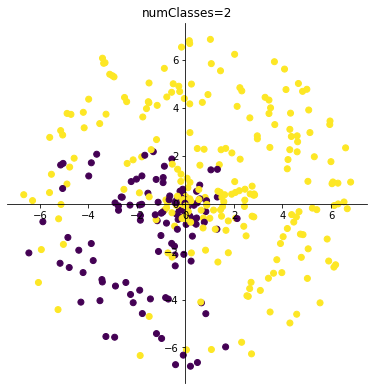

In [131]:
X_circles2 = generateData(500, 'c', numClasses=2, numOutputs=2, noise=0.8)
np.random.shuffle(X_circles2)
X_circles2_train, X_circles2_test = split_train_test(X_circles2, 0.7)
visualizeData(X_circles2_train, 'numClasses=2')

## Training with Sigmoid Activation function


Noise:  0.8
Iterations:  10000
Final Training Accuracy:  80.86
Activation Type:  sigmoid


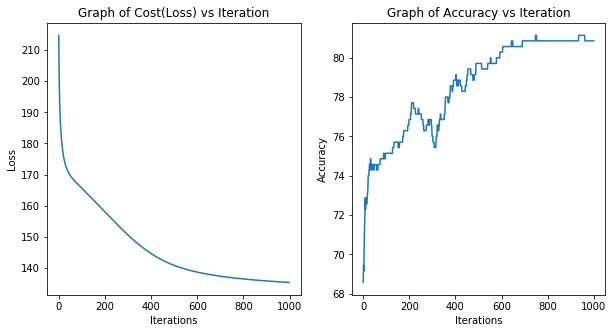

In [132]:
# train( X, numInput, numHiddenUnits, numOutput, activationType, numIter) \\
print("Noise: ", 0.8)
W1, W2 = train(X_circles2_train, numInput=2, numHiddenUnits=4, numOutput=2, activationType='sigmoid', numIter=10000)

#### Testing with Sigmoid

In [133]:
# W1, W2 = train(X, numInput=2, numHiddenUnits=4, numOutput=2, activationType='sigmoid', numIter=100000)
pred = predict(X_circles2, W1, W2, numInput=2, numHiddenUnits=4, numOutput=2, activationType='sigmoid', verbosity=True )
print("sample output")
print(pred[:3])

X Shape: ==> (500, 4)
W1 Shape: ==> (3, 4)
W2 Shape: ==> (4, 2)
prediction Output Shape ==> (500, 7)

Accuracy(%):  79.2
sample output
[[-4.71560382  3.72577496  0.          1.          0.          1.
   0.15741334]
 [ 0.17836902 -0.50993804  1.          0.          1.          0.
   0.538229  ]
 [ 6.28522416  0.85546459  0.          1.          0.          1.
   0.00707683]]


## Training with ReLu Activation function

Noise:  0.8
Iterations:  10000
Final Training Accuracy:  75.71
Activation Type:  reLu


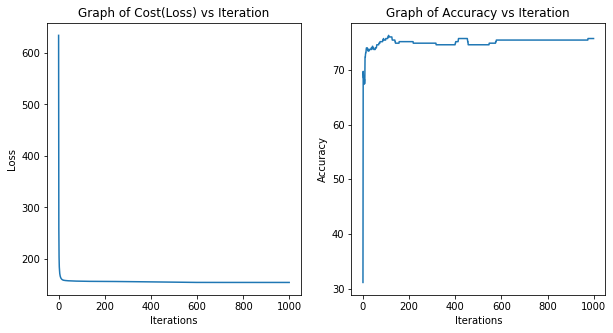

In [134]:
# train( X, numInput, numHiddenUnits, numOutput, activationType, numIter) \\
print("Noise: ", 0.8)
W1, W2 = train(X_circles2_train, numInput=2, numHiddenUnits=4, numOutput=2, activationType='reLu', numIter=10000)

#### Testing with ReLu

In [135]:
# W1, W2 = train(X, numInput=2, numHiddenUnits=4, numOutput=2, activationType='reLU', numIter=100000)
pred = predict(X_circles2_test, W1, W2, numInput=2, numHiddenUnits=4, numOutput=2, activationType='reLu', verbosity=True )
print("sample output")
print(pred[:5])

X Shape: ==> (150, 4)
W1 Shape: ==> (3, 4)
W2 Shape: ==> (4, 2)
prediction Output Shape ==> (150, 7)

Accuracy(%):  68.0
sample output
[[ 0.54192976 -1.30924432  1.          0.          1.          0.
   0.53133733]
 [ 2.24836068  1.32519407  0.          1.          0.          1.
   0.01332571]
 [ 0.3632552   0.25086286  1.          0.          0.          1.
   1.17330617]
 [-0.60731518 -0.1554424   0.          1.          1.          0.
   1.04247076]
 [-4.68824361  0.12475167  1.          0.          1.          0.
   0.58860486]]


## Training with Linear Activation function

Noise:  0.8
Iterations:  10000
Final Training Accuracy:  74.29
Activation Type:  linear


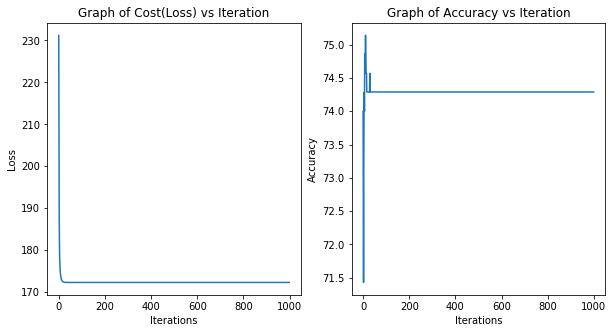

In [136]:
# train( X, numInput, numHiddenUnits, numOutput, activationType, numIter) \\
print("Noise: ", 0.8)
W1, W2 = train(X_circles2_train, numInput=2, numHiddenUnits=4, numOutput=2, activationType='linear', numIter=10000)

#### Testing with Linear

In [137]:
# W1, W2 = train(X, numInput=2, numHiddenUnits=4, numOutput=2, activationType='reLU', numIter=100000)
pred = predict(X_circles2_test, W1, W2, numInput=2, numHiddenUnits=4, numOutput=2, activationType='reLu', verbosity=True )
print("sample output")
print(pred[:3])

X Shape: ==> (150, 4)
W1 Shape: ==> (3, 4)
W2 Shape: ==> (4, 2)
prediction Output Shape ==> (150, 7)

Accuracy(%):  30.669999999999998
sample output
[[ 0.54192976 -1.30924432  1.          0.          1.          0.
   0.61144924]
 [ 2.24836068  1.32519407  0.          1.          1.          0.
   0.71430009]
 [ 0.3632552   0.25086286  1.          0.          1.          0.
   0.64243144]]


# Part 1D ( Refactor code)

In [165]:
#Helper functions

def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z): 
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

def linear(Z):
    cache = Z
    return Z, cache

def softmax(Z): 
    expZ = np.exp(Z)
    A = expZ / (np.sum(expZ, axis=1, keepdims=True))
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) 
    
    R = (Z > 0).astype(int)
    dZ = dA * R
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache       
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def linear_backward(dA, cache):
    dZ = dA    
    return dZ


In [166]:
class Model:

    def __init__(self, numInputs=2, numOutputs=1, layerSize=2, numHiddenLayers=2, activationType='R'):
        """
        numInputs: number of inputs to the net
        numOuputs: number of output units in the output
        layerSize: the number of units in each hidden layer
        activationType: either ’L’ (linear), ’S’ (sigmoid), ’R’(reLU)
        This is the activation type of all hidden layers.
        """
        self.numInputs = numInputs
        self.numOutputs = numOutputs
        self.layerSize = layerSize
        self.numHiddenLayers = numHiddenLayers
        self.activationType = activationType

    def initWeights(self, mean, std):

        # create architecture
        layers = []
        layers.append(self.numInputs)
        layers.extend([self.layerSize] * self.numHiddenLayers)
        layers.append(self.numOutputs)
        weights = {}
        L = len(layers)

        for l in range(1, L):
            weights['W' + str(l)] = mean * np.random.randn(layers[l - 1] + 1, layers[l]) - std ** 2

        assert (weights['W' + str(l)].shape == (layers[l - 1] + 1, layers[l]))
        self.weights = weights
        return self.weights

    def setWeights(self, value):
        # create architecture
        layers = []
        layers.append(self.numInputs)
        layers.extend([self.layerSize] * self.numHiddenLayers)
        layers.append(self.numOutputs)
        weights = {}
        L = len(layers)

        for l in range(1, L):
            weights['W' + str(l)] = np.ones((layers[l - 1] + 1, layers[l])) * value

        assert (weights['W' + str(l)].shape == (layers[l - 1] + 1, layers[l]))
        self.weights = weights
        return self.weights

    def setInput(self, X_train):

        samples = X_train.shape[0]

        self.X_train = X_train[:, 0:self.numInputs]
        t = X_train[:, self.numInputs:]
        self.T_train = t.reshape((samples, -1)).astype(int)

        assert self.X_train.shape[1] + self.T_train.shape[1] == self.numInputs + self.numOutputs

    def setTest(self, X_test):
        samples = X_test.shape[0]

        self.X_test = X_test[:, 0:self.numInputs]
        t = X_test[:, self.numInputs:]
        self.T_test = t.reshape((samples, -1)).astype(int)

        assert self.X_test.shape[1] + self.T_test.shape[1] == self.numInputs + self.numOutputs

    def cost_l2(self, y, t):
        """
        The L2 loss function
        """
        total = 0.5 * ((y - t) ** 2)
        return total.sum()

    def cost_entropy(self, y, t):
        """
        The Cross-entropy loss function
        """
        total = -(t * np.log(y))
        return total.sum()

    def linear_forward(self, A, W):

        Z = np.dot(A, W)
        assert (Z.shape == (A.shape[0], W.shape[1]))
        cache = (A, W)
        return Z, cache

    def linear_activation_forward(self, A_prev, W, activation):

        if activation == "S":
            Z, linear_cache = self.linear_forward(A_prev, W)
            A, activation_cache = sigmoid(Z)

        elif activation == "R":
            Z, linear_cache = self.linear_forward(A_prev, W)
            A, activation_cache = relu(Z)

        elif activation == "L":
            Z, linear_cache = self.linear_forward(A_prev, W)
            A, activation_cache = sigmoid(Z)

        elif activation == "softmax":
            Z, linear_cache = self.linear_forward(A_prev, W)
            A, activation_cache = softmax(Z)

        assert (A.shape == (A_prev.shape[0], W.shape[1]))
        cache = (linear_cache, activation_cache)

        return A, cache

    def forwardPropagation(self, X, parameters):

        caches = []
        A = X

        #   add Bias
        bias = np.ones((A.shape[0], 1))
        A = np.column_stack((A, bias))

        L = len(parameters)

        for l in range(1, L):
            A_prev = A
            A, cache = self.linear_activation_forward(A_prev, parameters['W' + str(l)], activation=self.activationType)
            caches.append(cache)
            # add Bias
            bias = np.ones((A.shape[0], 1))
            A = np.column_stack((A, bias))

        # going to last layer
        if self.numOutputs == 1:
            # sigmoid unit
            Y_, cache = self.linear_activation_forward(A, parameters['W' + str(L)], activation='S')
        else:
            # softmax layer
            Y_, cache = self.linear_activation_forward(A, parameters['W' + str(L)], activation='softmax')
        caches.append(cache)

        if self.numOutputs == 1:
            assert (Y_.shape == (X.shape[0], 1))
        else:
            assert (Y_.shape == (X.shape[0], self.numOutputs))  # to check
        return Y_, caches

    def linear_backward(self, dZ, cache):

        A_prev, W = cache

        dW = np.dot(cache[0].T, dZ)
        dA_prev = np.dot(dZ, cache[1].T)

        assert (dA_prev.shape == A_prev.shape)
        assert (dW.shape == W.shape)

        return dA_prev, dW

    def linear_activation_backward(self, dA, cache, activation):

        linear_cache, activation_cache = cache

        if activation == "R":
            dZ = relu_backward(dA, activation_cache)

        elif activation == "S":
            dZ = sigmoid_backward(dA, activation_cache)

        elif activation == "L":
            dZ = sigmoid_backward(dA, activation_cache)

        dA_prev, dW = self.linear_backward(dZ, linear_cache)

        return dA_prev, dW


    def backPropagation(self, Y_, T, caches):

        grads = {}
        L = len(caches)  # the number of layers
        m = Y_.shape[0]
        assert Y_.shape == T.shape

        # Initializing the backpropagation
        if self.numOutputs == 1:
            dY_ = T - Y_  # T-Y
        else:
            dY_ = T - Y_

        current_cache = caches[-1]

        grads["dA" + str(L)], grads["dW" + str(L)] = self.linear_activation_backward(dY_, current_cache, 'S')

        for l in reversed(range(L - 1)):
            current_cache = caches[l]
            dA_prev_temp, dW_temp = self.linear_activation_backward(dY_, current_cache, 'S')
            grads["dA" + str(l)] = dA_prev_temp
            grads["dW" + str(l + 1)] = dW_temp

        return grads

    def updateParameters(self, parameters, grads, learning_rate):

        L = len(parameters)
        for l in range(L):
            parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] + learning_rate * grads["dW" + str(l + 1)]
        return parameters

    def train(self, numIter, alpha):

        costs = []

        for epoch in range(numIter):
            #  forward pass
            Y_, caches = self.forwardPropagation(self.X_train, self.weights)

            #  compute cost
            cost = self.cost_l2(Y_, self.T_train)

            #  back pass
            grads = self.backPropagation(Y_, self.T_train, caches)

            # update weights
            self.weights = self.updateParameters(self.weights, grads, alpha)

            costs.append(cost)
        self.train_costs = costs
        return costs

    def test(self):

        X = self.X_test
        T = self.T_test

        #  forward pass
        Y, caches = self.forwardPropagation(X, self.weights)
        cost = self.cost_l2(Y, T)
        return cost

    def predict(self, X):
        Y, caches = self.forwardPropagation(X, self.weights)
        if self.numOutputs == 1:
            return np.rint(Y)
        else:
            return (Y == Y.max(axis=1)[:, None]).astype(int)
        return (Y)


# Testing  Based on Given Template

#### Generate Data

In [167]:
X = generateData( 100, 'g', numClasses=2, numOutputs=1 ) # use 2 gaussians to generate
# 100 data points, with a single target value (0 or 1)

np.random.shuffle(X) # make sure the examples are shuffled
X_train = X[:90] # create a 90/10 train/test split
X_test = X[90:]

(100, 3)


In [168]:
net = Model(numInputs=2, numOutputs=1, layerSize=2, numHiddenLayers=2, activationType='S')
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0.0,0.01)
net.train(100, 0.1)[-5:]


[0.10583899194565012,
 0.1044681713423247,
 0.10313093342929915,
 0.10182608756643391,
 0.10055249789491609]

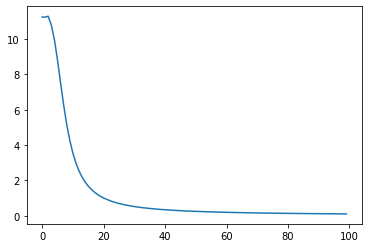

In [169]:
costs = net.train_costs
plt.plot(costs)

In [143]:
net.test()

0.009252777067340146

In [144]:
net.predict(X_test[:,:2])

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.]])

# Part 1E:  Allow a variable number of hidden units

### Layer size=5

In [145]:
net = Model(numInputs=2, numOutputs=1, layerSize=5, numHiddenLayers=2, activationType='S')
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0.0,0.01)
net.train(100, 0.1)[-5:]

[0.11845220970475613,
 0.11693234578186296,
 0.11544297386259651,
 0.113983253960331,
 0.11255237734033555]

### Proof ( Checking the size of  weights generated in hidden unit)

In [146]:
weights = net.weights
for k, v in weights.items():
    print(k, v.shape)

W1 (3, 5)
W2 (6, 5)
W3 (6, 1)


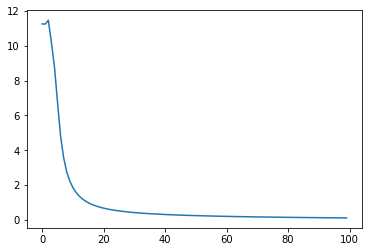

In [147]:
costs = net.train_costs
plt.plot(costs)

### Layer size = 20

In [148]:
net = Model(numInputs=2, numOutputs=1, layerSize=20, numHiddenLayers=2, activationType='S')
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0.0,0.01)
net.train(100, 0.1)[-5:]

[0.07949099910066992,
 0.07838579322700431,
 0.07730368062586025,
 0.07624403576268317,
 0.07520625452849479]

### Proof ( Checking the size of  weights generated in hidden unit)

In [149]:
weights = net.weights
for k, v in weights.items():
    print(k, v.shape)

W1 (3, 20)
W2 (21, 20)
W3 (21, 1)


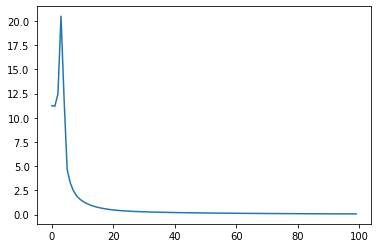

In [151]:
costs = net.train_costs
plt.plot(costs)

# Part 1F:  Allow the various possible activation types

## ActivationType = ReLu

In [152]:
net = Model(numInputs=2, numOutputs=1, layerSize=2, numHiddenLayers=2, activationType='R')
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0.0,0.01)
net.train(100, 0.1)[-5:]


[0.04175222306039323,
 0.04100941679440631,
 0.040695442790002256,
 0.04008937557142324,
 0.039711573252081675]

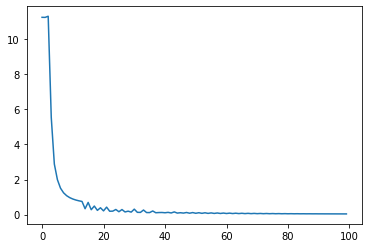

In [153]:
costs = net.train_costs
plt.plot(costs)

## ActivationType = Sigmoid

In [154]:
net = Model(numInputs=2, numOutputs=1, layerSize=2, numHiddenLayers=2, activationType='S')
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0.0,0.01)
net.train(100, 0.1)[-5:]

[0.18363210644102756,
 0.18134886333454323,
 0.179113223038248,
 0.17692374223032836,
 0.17477903779631246]

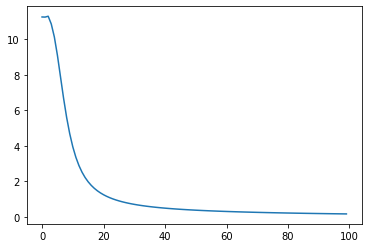

In [155]:
costs = net.train_costs
plt.plot(costs)

# ActivationType = Linear

In [156]:
net = Model(numInputs=2, numOutputs=1, layerSize=2, numHiddenLayers=2, activationType='L')
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0.0,0.01)
net.train(100, 0.1)[-5:]

[0.18363210644102756,
 0.18134886333454323,
 0.179113223038248,
 0.17692374223032836,
 0.17477903779631246]

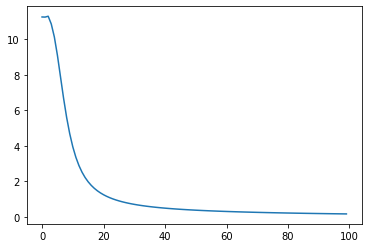

In [157]:
costs = net.train_costs
plt.plot(costs)

# Part 1h:  Allow Multiple Hidden Layer 
### HiddenLayer = 5

In [158]:
net = Model(numInputs=2, numOutputs=1, layerSize=2, numHiddenLayers=5, activationType='S')
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0.0,0.01)
net.train(100, 0.1)[-5:]

[0.12897739542191736,
 0.12690213654140162,
 0.12488986886980537,
 0.12293784369679084,
 0.12104346684240694]

### proof ==> Number of weights is 6

In [159]:
net.weights.keys()

dict_keys(['W1', 'W2', 'W3', 'W4', 'W5', 'W6'])

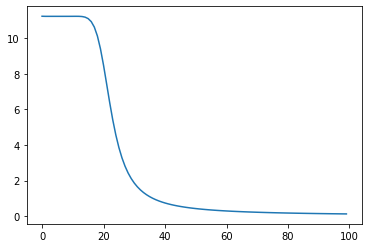

In [160]:
costs = net.train_costs
plt.plot(costs)

## Hidden Layer = 10

In [161]:
net = Model(numInputs=2, numOutputs=1, layerSize=2, numHiddenLayers=10, activationType='S')
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0.0,0.01)
net.train(100, 0.1)[-5:]

[0.2077461446342134,
 0.20273276194496448,
 0.19794252004816448,
 0.19336130353814374,
 0.1889761384956281]

### proof ==> Number of weights is 11

In [162]:
net.weights.keys()

dict_keys(['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11'])

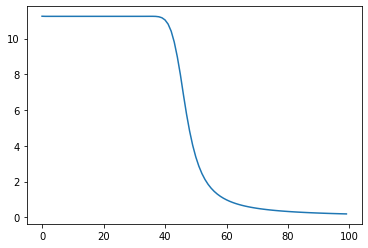

In [163]:
costs = net.train_costs
plt.plot(costs)

# END